# EDA & Feature Engineering

## 1. Input dan Membaca Data

Pertama-tama, kita harus mengimpor / memasukkan data nya ke dalam Notebook ini.


In [2]:
# import atau panggil library pandas dengan alias pd
import pandas as pd

# Kita akan mengakses datasets titanic melalui komputer kita, sehingga harus di download terlebih dahulu.
# link download: https://drive.google.com/drive/folders/1QSP2R_Rj1S-nx2nSnZ__uoeOtLL_y0C3
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [3]:
import pandas as pd
import io

# memasukkan data sebagai variabel dataframe df
df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# cek ukuran dataframe
print(df.shape)

(891, 12)


(891, 12) artinya pada dataset ini kita memiliki 890 baris dan 12 kolom/feature

In [5]:
# cek karakteristik dari masing-masing kolom (tipe data, jumlah null atau missing value, nama-nama kolom)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


891 non-null artinya terdapat 891 non-missing values di kolom tersebut. Tetapi pada beberapa kolom kita memiliki beberapa missing value seperti Age, Cabin, dan Embarked yang perlu kita lengkapi

## 2. Data Cleaning
Adalah sebuah proses menyiapkan data untuk analisis dengan menghapus atau memodifikasi data yang salah, tidak lengkap, tidak relevan, duplikat, atau format yang salah. Terdapat beberapa cara dalam melakukan *Data Cleaning*, diantaranya yaitu:

---

### a. Data Cleaning dengan Penghapusan Baris
Karena hanya ada sedikit data yang null, maka pada langkah ini kita akan menghapus baris yang memiliki nilai null.

In [6]:
# Kita akan meng-drop / menghapus missing value di kolom 'Embarked'
df = df.dropna(subset=['Embarked'], inplace=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
None


In [7]:
df[df['Embarked'].isna()] #filtering

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
df.shape

(889, 12)

In [9]:
# Karena banyak value NaN di cabin kita bisa membuang kolom tersebut
df = df[["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Embarked"]]

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None


Kita sudah berhasil melakukan data cleaning. Sekarang kita memiliki dataset dengan 889 non-null values

### b. Data Cleaning dengan Pengisian

In [11]:
# mengisi missing values pada kolom 'Age' dengan mediannya
df['Age'] = df['Age'].fillna(df['Age'].median())
df[df.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None


## 3. Exploratory Data Analysis

Sekarang data kita sudah bersih! Kita siap untuk melanjutkan dengan langkah berikutnya: Exploratory Data Analysis.

*   Pertama, kita akan menggunakan dasar statistik pada variabel numerikal (Survived)
*   Selanjutnya, kita akan melihat distribusi dari setiap variabel menggunakan bar chart untuk variabel kategorikal dan histogram untuk variabel numerikal




In [13]:
# df.describe() dapat digunakan untuk mendapatkan nilai dari descriptive statistics (mean, median, max, min, dll. )
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

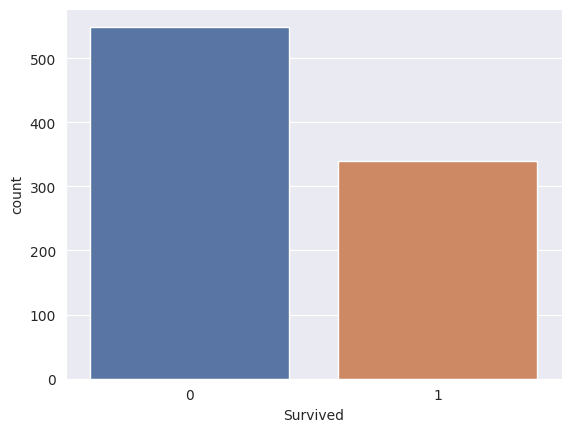

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# melihat persebaran nilai Survived
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df, palette='deep')

<Axes: xlabel='Survived', ylabel='count'>

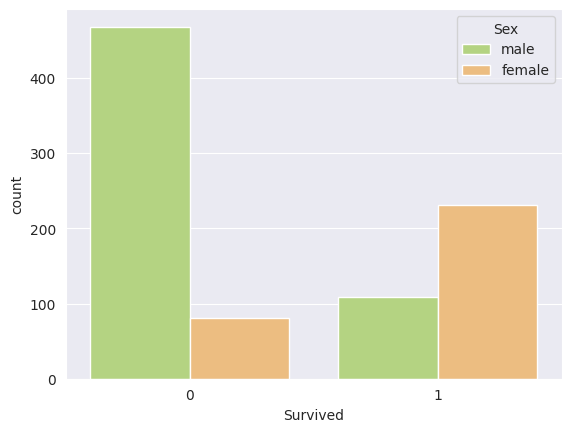

In [15]:
# visualisasi data dari kolom survived berdasarkan kategori sex
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdYlGn_r')

<Axes: xlabel='Survived', ylabel='count'>

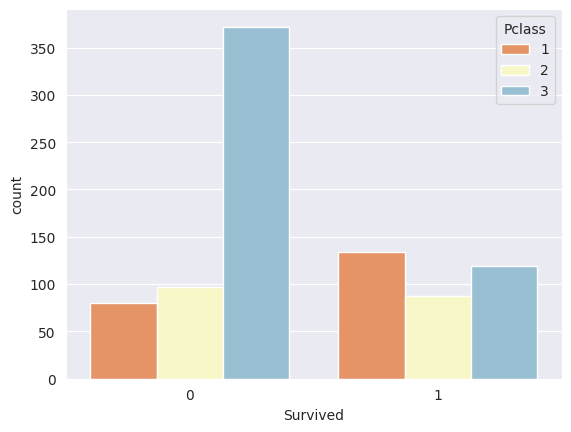

In [16]:
# menvisualisasikan data kolom survive berdasarkan kelas tiket
sns.countplot(x='Survived',hue='Pclass',data=df, palette = 'RdYlBu')

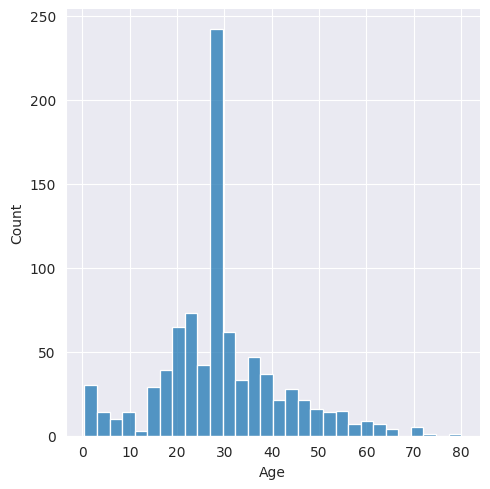

In [17]:
# melihat range umur
sns.displot(df['Age'].dropna(),kde=False,bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

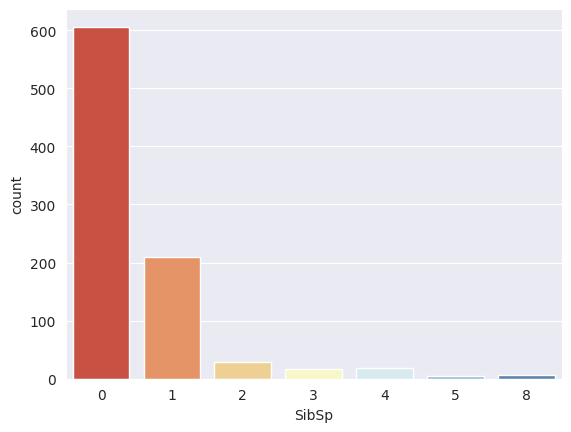

In [18]:
# visualisasi nilai "survived" berdasarkan jumlah saudara
sns.countplot(x='SibSp',data=df, palette = 'RdYlBu')

<Axes: >

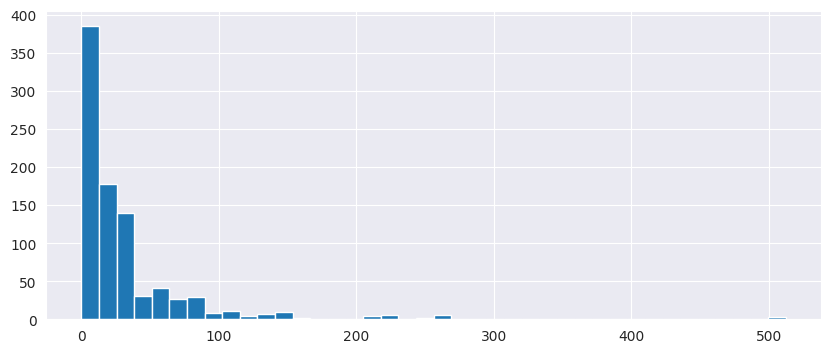

In [19]:
# melihat range fare
df['Fare'].hist(bins=40,figsize=(10,4))

In [20]:
import cufflinks as cf
cf.go_offline(True)

<Axes: ylabel='Frequency'>

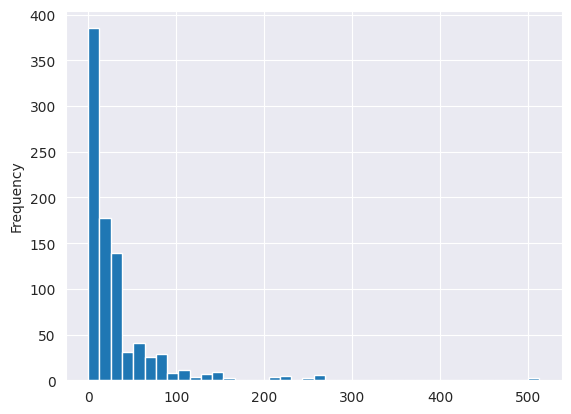

In [21]:
df['Fare'].plot(kind='hist',bins=40)

<Axes: xlabel='Parch', ylabel='count'>

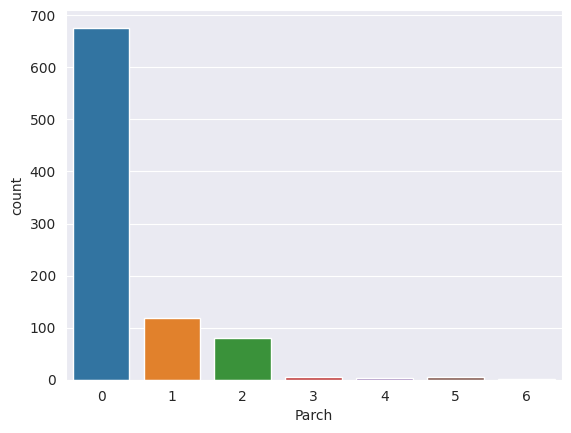

In [22]:
sns.countplot(x='Parch',data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

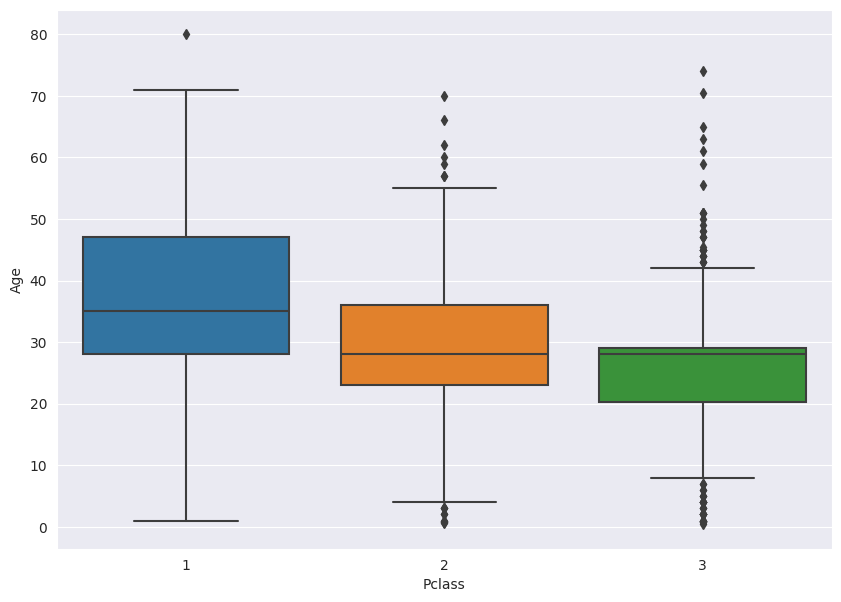

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

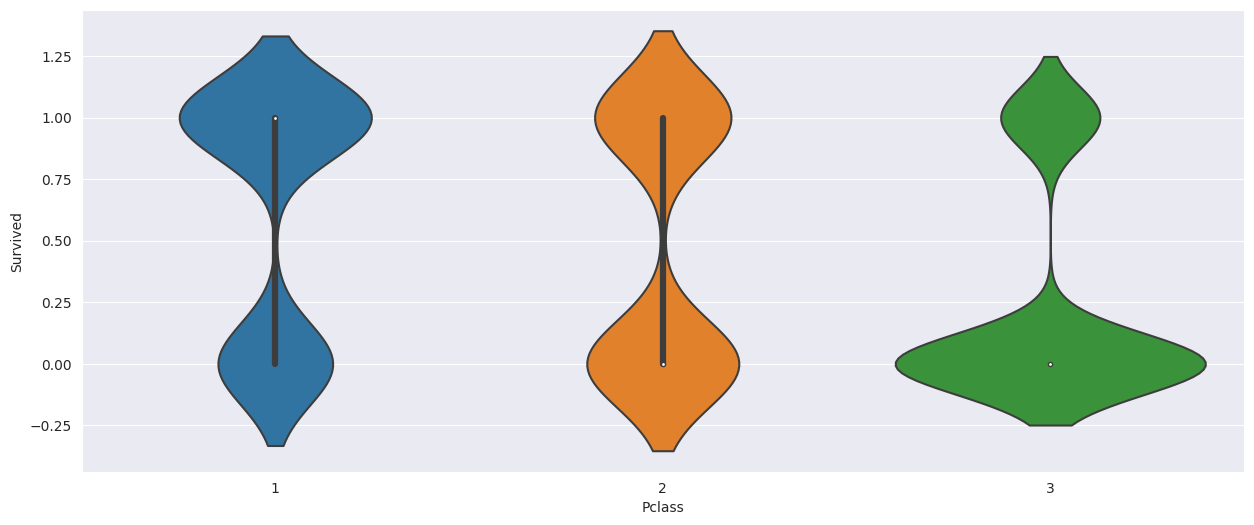

In [24]:
plt.figure(figsize = (15, 6))
#plt.axis([1,3,0,1])

sns.violinplot(data = df, x = 'Pclass', y = 'Survived')

<Axes: xlabel='Pclass', ylabel='Sex'>

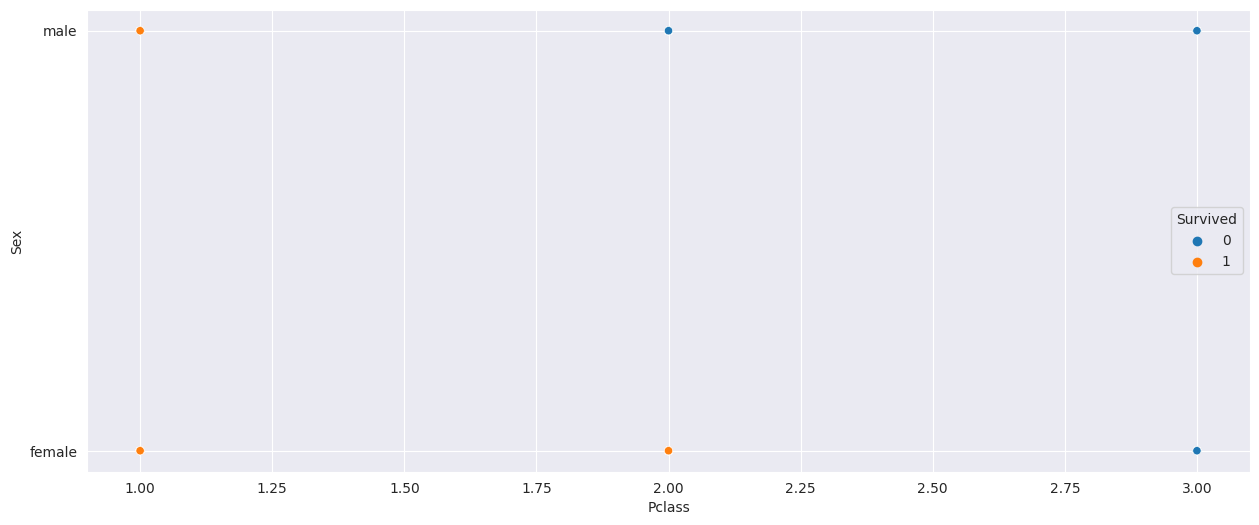

In [25]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df, x = 'Pclass', y = 'Sex', hue = 'Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

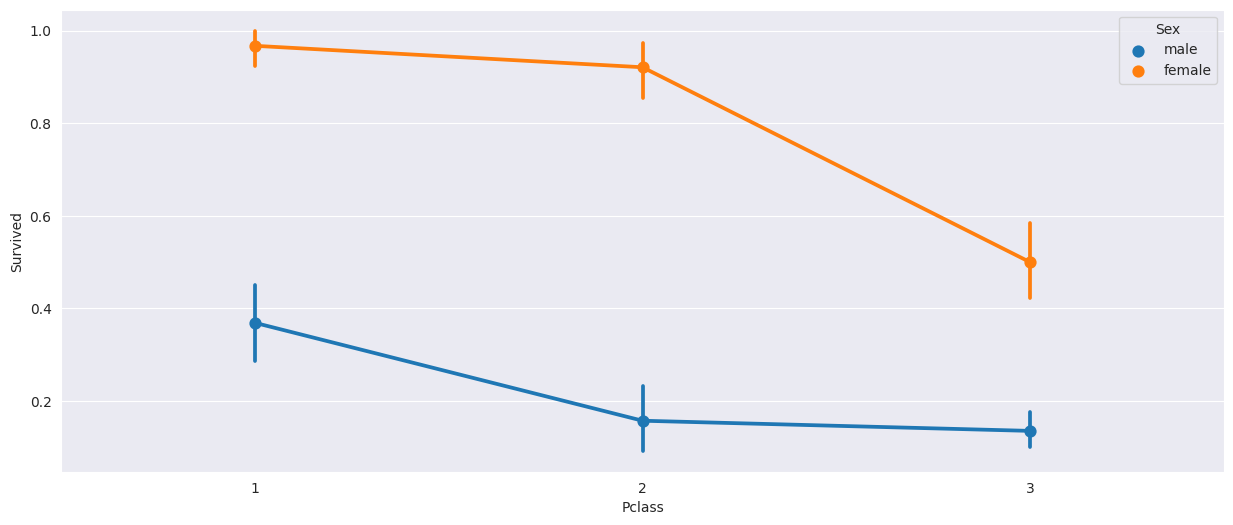

In [26]:
plt.figure(figsize = (15,6))
sns.pointplot(data = df, x = 'Pclass', y = 'Survived', hue = 'Sex')

## 4. Feature Engineering

Data cleaning -- check ✅

Exploratory data analysis -- check ✅

Sekarang kita akan melakukan langkah selanjutnya: feature engineering!

*   Pertama, kita akan melakukan *label encoding* untuk mengubah feature kategorikal menjadi feature numerikal 
*   Selanjutnya, kita akan membuat heatmap untuk menemukan feature yang memiliki koefisien korelasi tertinggi

In [27]:
# kita akan melakukan pengisian data berdasarkan hasil pengamatan (EDA)
df = pd.read_csv('titanic.csv')

In [28]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [29]:
# mengisi nilai umur
df['Age'] = df[['Age','Pclass']].apply(inpute_age,axis=1)

<Axes: >

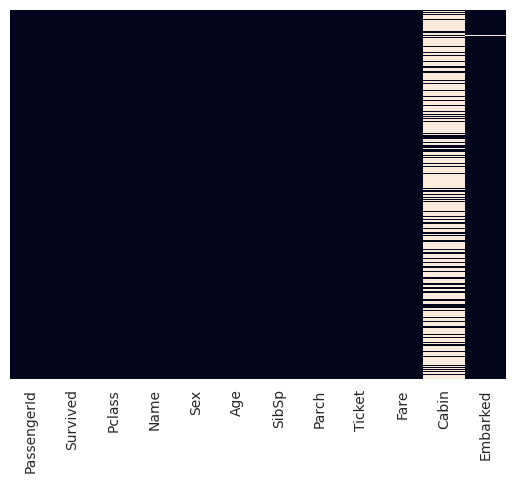

In [30]:
# melihat nilai nan
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [31]:
df.drop('Cabin',axis=1,inplace=True)

In [32]:
df.dropna(inplace=True)

In [33]:
# hot-encoding
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [34]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [35]:
# hot-encoding
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [36]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [37]:
# menggabungkan feature yang telah dibuat
train = pd.concat([df,sex,embark],axis=1)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [39]:
# membuang feature yang tidak dapat digunakan
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [42]:
train.drop('PassengerId',axis=1,inplace=True)

In [43]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [44]:
pclass = pd.get_dummies(train['Pclass'])

In [45]:
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [46]:
train = pd.concat([train,pclass],axis=1)

In [47]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


Sekarang, ayo kita buat heatmap !

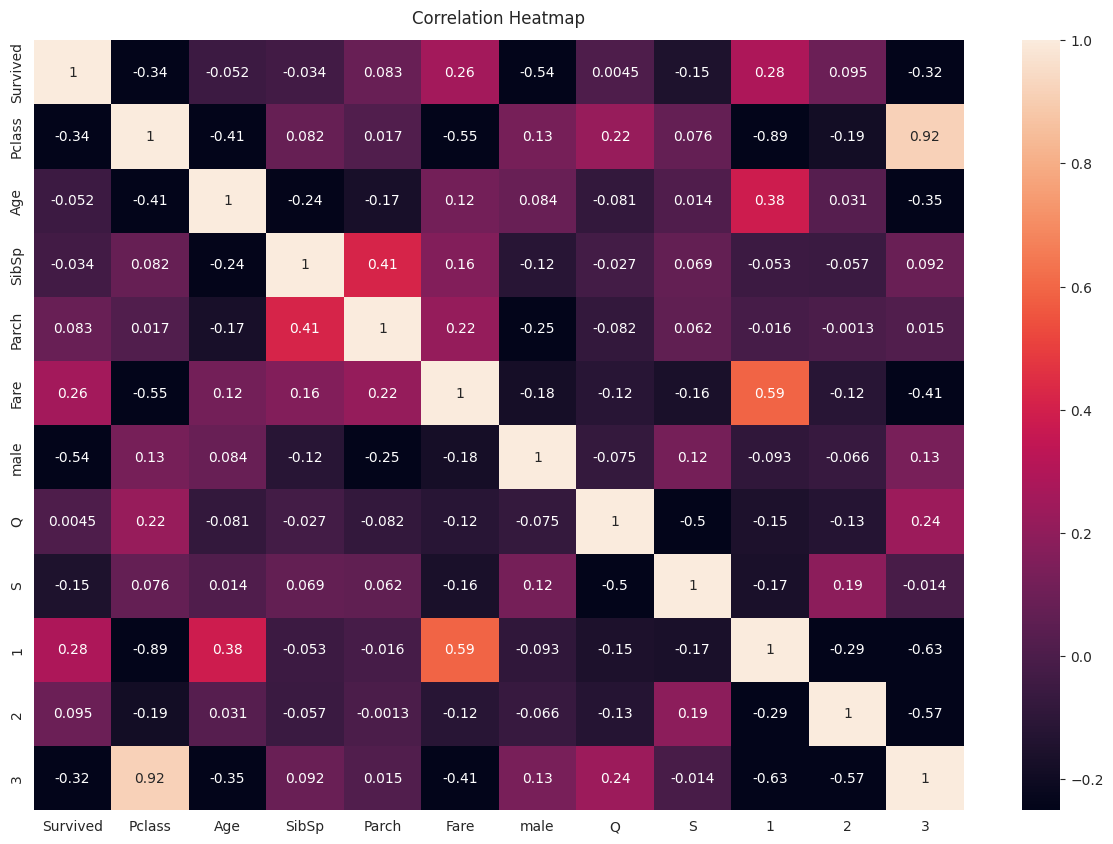

In [48]:
# mengimpor pyplot dari matplotlib untuk membantu kita membuat plot
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns

# menentukan ukuran plot
plt.figure(figsize=(15, 10))
# membuat korelasi heatmap
heatmap = sns.heatmap(train.corr(), vmin=-0.25, vmax=1, annot = True)
# menentukan format plot (judul, ukuran text)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [49]:
df_quantile = train
# membagi nilai di masing2 mata pelajaran menjadi "quartiles"
df_quantile['Age'] = pd.cut(df_quantile['Age'], bins=4,
                               labels = False)
df_quantile['Fare'] = pd.cut(df_quantile['Fare'], bins =4,
                               labels = False)
df_quantile

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,0,3,1,1,0,0,1,0,1,0,0,1
1,1,1,1,1,0,0,0,0,0,1,0,0
2,1,3,1,0,0,0,0,0,1,0,0,1
3,1,1,1,1,0,0,0,0,1,1,0,0
4,0,3,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,1,0,1,0,1,0
887,1,1,0,0,0,0,0,0,1,1,0,0
888,0,3,1,1,2,0,0,0,1,0,0,1
889,1,1,1,0,0,0,1,0,0,1,0,0


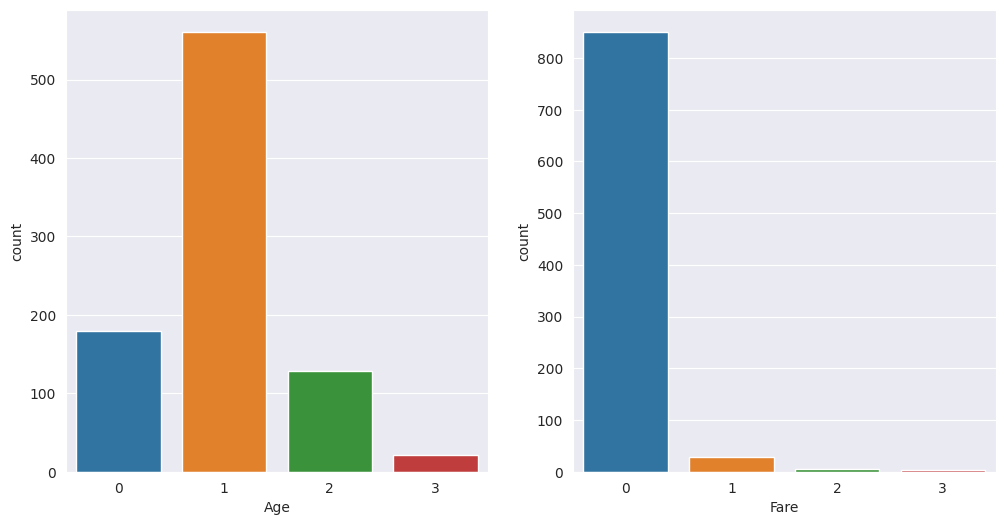

In [50]:
fig,axes =  plt.subplots(1,2, figsize=(12, 6))
sns.countplot(x='Age', data=train, ax=axes[0]);
sns.countplot(x='Fare', data=train, ax=axes[1]);